### "Precios al descubierto: El lado oculto detrás de los alarmantes precios"

Cuba, es un país que a lo largo de los años se ha caracterizado por tener un pueblo el cual siempre estará dispuesto a luchar y vencer ante cualquier tipo de adversidad. Sin embargo no es menos cierto que en los últimos años el país ha estado atravesando una gran crisis económica que ha dado lugar no solo a que exista una menor disponibilidad de todos aquellos artículos y alimentos que contribuyen al bienestar de la población cubana.
La escasez ha traído, además como consecuencia directa, que los precios de los productos  a los que el cubano debe acceder día a día hayan sufrido alarmantes variaciones, generalmente desfavorables para el bolsillo del trabajador y del cubano en general.

Por la importancia que tiene la variación de los precios para el día a día del cubano y para la economía en general, a través de la realización de este proyecto, podremos analizar el comportamiento de algunos de estos productos, algunos de ellos imprescindibles en el hogar como es el caso de la cebolla, así como otros que, aunque son hasta cierto punto dañinos para la salud, contribuyen a que el cubano disfrute y pase un momento agradable al lado de los seres que más quiere.
El estudio se basa en el análisis del comportamiento de los precios de una serie de productos, en este caso la cebolla, la cerveza y otro tipo de bebidas alcohólicas(ron, whisky y vodka), con la finalidad de no solo averiguar cuál es el precio promedio de cada producto, sino también de investigar si existen o no factores externos que influyan en la variación de los mismos.

### Proceso de análisis y extracción de los datos

Para poder realizar un estudio eficaz de un determinado producto, se requiere de un intenso trabajo de recopilación de datos, sin el que no tendríamos pruebas para afirmar un determinado planteamiento. En este caso para recopilar los datos, se recorrieron una serie de cafeterías y mercados agropecuarios ubicados en diferentes puntos del municipio Habana del Este, haciendo énfasis en Guanabo, el Reparto Camilo Cienfuegos, Alamar, el reparto Bahía y Cojímar.
 Para asegurarnos de que el dato capturado a través de una foto correspondiera a uno de los lugares mencionados anteriormente se utilizaron los metadatos correspondientes a la ubicación de la foto. Por lo que es posible corroborar el precio de los diferentes productos.
 

Una vez obtenidos los datos, se inicia un nuevo proceso de limpieza y procesamiento de datos, en el que nos aseguramos de conservar las imágenes que sean bien legibles y las que hayan guardado correctamente los metadatos correspondientes a la ubicación en la que se tomó la imagen. El procesamiento de datos de nuestro proyecto se ha basado en la creación de una base de datos la cual nos permitirá realizar el estudio de los precios.
Para crear la base de datos se utilizó un archivo en formato json en el cual se crearon tres diccionarios distintos, uno referente a la cerveza, otro referente a la cebolla y otro referente a las diferentes bebidas alcohólicas(ron, whisky y vodka).
Cada diccionario contiene a su vez una lista de diccionarios en el que aparecen distintas categorías, según el análisis que se realizará por cada producto.
En el caso de la cerveza nuestro estudio estará enfocado en el precio de la misma, la marca, el tipo de envase y la capacidad del mismo, el porcentaje de alcohol que presenta, la capacidad del envase, su color y el país del que procede.
De manera similar para analizar las restantes bebidas alcohólicas se tentrán en cuenta la marca del producto, el porcentaje de alcohol, el país de procedencia, el material en el que se encuentra envasado el producto, el precio y la capacidad del mismo.
La dinámica a la hora de analizar la cebolla cambia completamente, por lo que en este estudio para combrobar si existe o no algún factor que influye en el precio de nuestros productos analizaremos las categorías referentes al color de la cebolla, su precio en relación con su color, la forma en que es adquirido(libra, unidad, paquete, ristra) y la zona en la que se vende. 
Una vez analizadas las categorías que serán objeto de estudio por producto, es necesario cargar nuestro archivo json en python para así poder automatizar nuestro análisis y obtener mejores resultados. Para ello utilizaremos el módulo json, y para el procesamiento y manipulación de los datos usaremos la bibliteca pandas luego de ser instalada previamente.


In [1]:
#se importa el módulo que nos permite cargar nuestro json
import json
#importamos la biblioteca pandas para procesar todos los datos en tablas
import pandas as pd
#para abrir el archivo json en modo lectura.
#se utiliza encoding para que python pueda leer los caracteres especiales como las tildes, etcétera
with open("./Proyecto.json", "r", encoding="utf-8") as file: 
    data= json.load(file)   #para cargar el archivo

In [2]:
#importaremos las biblitecas que nos permitan realizar gráficos en python, en este caso seaborn y matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

#### Análisis del precio de la cerveza 
El estudio del precio de la cerveza requiere de la extracción del diccionario de nuestro json referente a la cerveza. Para ello se utilizará pandas y se agruparán todos los datos en un data frame el cual nos facilitará posteriormente su manipulación y visualización.

In [3]:
beer=data["cerveza"] #extraer la información del diccionario "cerveza"
df=pd.DataFrame(beer) #procesarla en un Dataframe
df.head() #mostrar las 5 primeras filas de nuestro dataframe para saber cómo es su estructura

,municipio,marca,precio,loc,imagenes,pais,porcentaje de alcohol,capacidad,tipo de envase,color
0,habana del este,Bucanero,350,"[23.169248580932617, -82.13765716552734]",./fotos/20230415_122624.jpg,Cuba,5.4,355,lata,oscura
1,habana del este,Cristal,350,"[23.169248580932617, -82.13765716552734]",./fotos/20230415_122624.jpg,Cuba,4.9,355,lata,clara
2,habana del este,None,300,"[23.169248580932617, -82.13765716552734]",./fotos/20230415_122624.jpg,None,None,None,None,NaN
3,habana del este,Cristal Extra,300,"[23.169559478759766, -82.13668060302734]",./fotos/20230415_123345.jpg,Cuba,5.2,350,botella,clara
4,habana del este,Cristal,270,"[23.169559478759766, -82.13668060302734]",./fotos/20230415_123345.jpg,Cuba,4.9,355,lata,clara


#### ¿De qué países provienen las diferentes marcas de cerveza que se importan en Cuba?

 Con un simple vistazo a la categoría correspondiente al país del que proviene nuestro producto nos percatamos de que la lista es bastante variada. 
 Entonces surge una pregunta bastante interesante: ¿Cuál es el país que más exporta cerveza hacia Cuba?
 Para darle solución a esta interrogante trabajaremos con la columna de nuestro Dataframe que está directamente relacionada con el país del cual proviene la cerveza. Luego convertiremos esta columna en una lista en la que solo introduciremos los datos de las cervezas de todos los países excepto Cuba. Una vez hecho esto, utilizaremos el módulo de estadísticas de Python para calcular la moda de nuestra lista y determinar cuál es el país más exportador de cerveza.

In [4]:
import statistics #permite calcular la moda en python a través de la funcion mode()
df_1= df["pais"] #filtar la columna del dataframe referente a los países 
countries=list(df_1) #crear una lista con los valores de la columna
international=[] #crear una lista vacía
for country in countries: #se crea este bucle para ingresar en la lista vacía creada anteriormente todos los países excepto Cuba
    if country!="Cuba": 
        international.append(country)

most_imported= statistics.mode(international) #Para hallar la moda de mi lista
print("El pais que más importa cerveza es " + most_imported ) #imprime cuál es el país que más importa


#En el caso del más importador, cuales son las marcas que más importa y cual es la mas cara de ellas

El pais que más importa cerveza es España


De la manipulación y el análisis de los datos anteriores se comprueba que el país que más importa cerveza en Cuba es España, seguido muy de cerca por Países Bajos.

#### Analicemos ahora cómo se comporta la exportación de los diferentes países teniendo en cuenta la cerveza:

Si bien es cierto que el país con mayor participación en la importación cubana es España, no podemos dejar de analizar el papel que juegan el resto de los países como importadores. Para esto, primero utilizaremos nuevamente la columna de los países, pero esta vez solamente tomaremos todos los países excepto Cuba y luego usaremos la función value_counts() para contar cuántas veces aparece un país.

In [5]:
country_beer=~df["pais"].isin(["Cuba"]) #se niega el data frame para así obtener todos las filas excepto las que dicen Cuba
#la función isin() se utiliza para filtrar uno o varios elementos determinados
column_beer_filtered= df[country_beer] #se crea una variable que contine el dataframe filtrado
country_beer_filtered=column_beer_filtered["pais"].value_counts()  #cuenta cuántas veces aparece repetido un país en la lista
country_beer_ordered= country_beer_filtered.sort_values(ascending=False) #ordena la columna del país más repetido al menos repetido
#cuando ascending es igual a False se ordena la columna de forma descendente

country_beer_ordered #se muestra el dataframe resultante

pais
España                  16
Países Bajos            15
Alemania                 9
Bélgica                  7
México                   5
República Dominicana     2
Polonia                  1
China                    1
Name: count, dtype: int64

Luego podemos concluir que el país que más exporta cerveza hacia Cuba es España, seguido de Países Bajos, Alemania, Bélgica y México respectivamente. Si buscamos cuáles son los países que menos participan en el comercio cubano, encontramos en último lugar a China, seguido de Polonia y República Dominicana.

<function matplotlib.pyplot.show(close=None, block=None)>

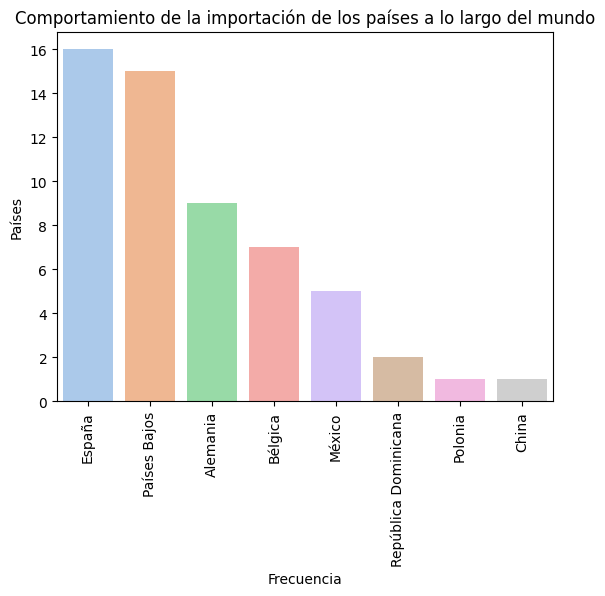

In [6]:
sns.barplot(y=country_beer_ordered.values, x=country_beer_ordered.index, palette="pastel") #crear el gráfico a través de sns.barplot y se definen los ejes
#para modificar el color de las barras en seaborn utilizamos la función palette
plt.title("Comportamiento de la importación de los países a lo largo del mundo") #nombre del gráfico
plt.xlabel("Frecuencia") #nombre del eje de las x
plt.ylabel("Países")  #nombre del eje de las y
plt.xticks(rotation=90) #el nombre de las barras saldrá de forma vertical

plt.show  #mostrar el gráfico

#### ¿Qué marcas exporta cada país?
Las barras de un solo color representan un mismo país, por lo que se puede observar la variedad de marcas por países. 
Luego es posible afirmar que España no solo es el país que más exporta cerveza, sino que también es el que más variedades de cervezas exporta a Cuba.


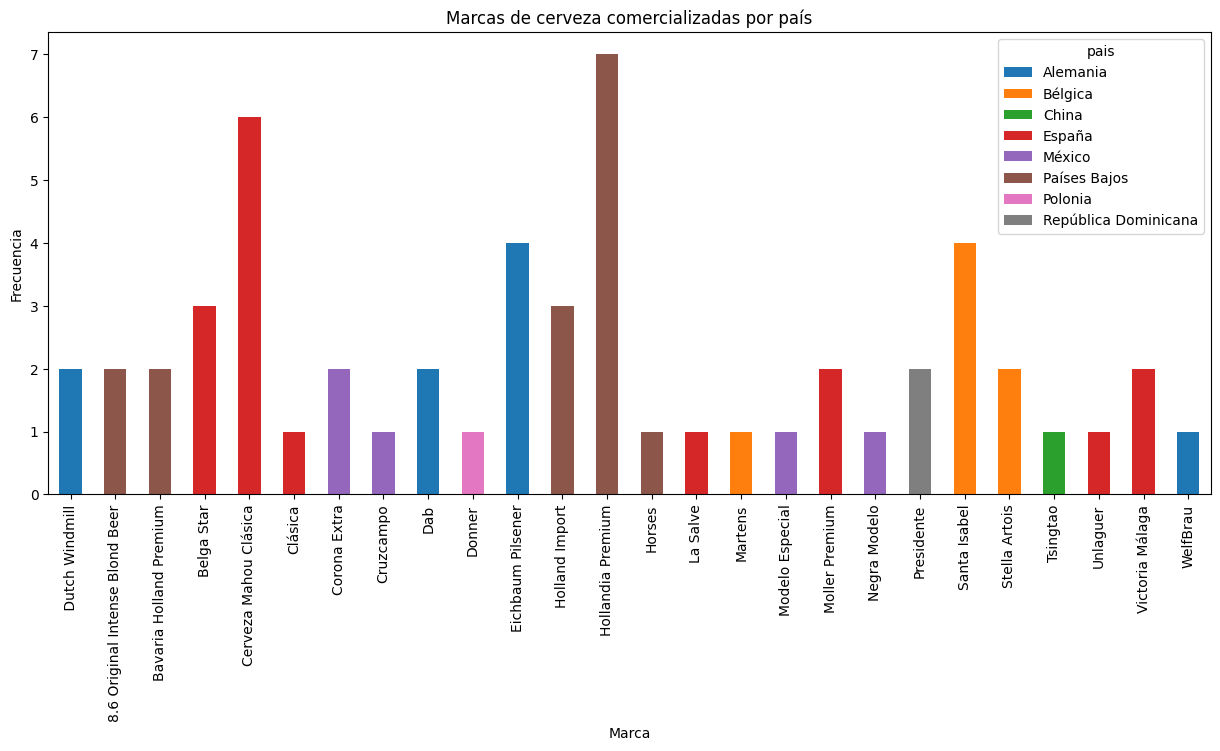

In [7]:
#por si no sale lo que quiero hacer arriba voy a usar este.
international_brands=column_beer_filtered[["marca","pais"]] #filtrar el dataframe en funcion a la columna del pais y la marca
international_brands_grouped= international_brands.groupby(["marca", "pais"]).size().unstack(fill_value=0)
#con groupby asociamos en en este caso dos columnas las correspondientes a la marca y al país de procedencia
ax= international_brands_grouped.plot(kind="bar", stacked=True, figsize=(15,6))

ax.set_xlabel("Marca")
ax.set_ylabel("Frecuencia")
ax.set_title("Marcas de cerveza comercializadas por país")

plt.show()


 Si bien ya hemos analizado la distribución de las cervezas atendiendo a su país de procedencia, qué cervezas pueden ser consideradas como las más caras y cuáles las más baratas.
 

<function matplotlib.pyplot.show(close=None, block=None)>

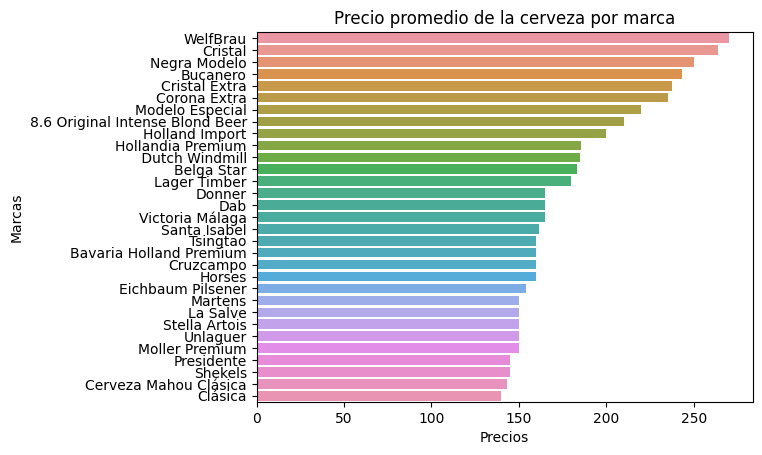

In [8]:
expensive_beers= df.groupby("marca")["precio"].mean() #hallar el promedio de los precios atendiendo a la marca
more_expensive_beers=expensive_beers.sort_values(ascending=False) #ordenar la columna de mayor a menor
more_expensive_beers  #reproduce el nuevo dataframe con los precios de la cerveza ordenados

#a través de la biblioteca seaborn se realizara un grafico de barras horizontal
sns.barplot(x=more_expensive_beers.values, y=more_expensive_beers.index) #crear el gráfico a través de sns.barplot y se definen los ejes
#Definir el nombre del gráfico y de los ejes
plt.title("Precio promedio de la cerveza por marca") #título del gráfico
plt.xlabel("Precios")  #título del eje de las x
plt.ylabel("Marcas")   #título del eje de las ordenadas

plt.show #mostrar el gráfico

Luego, las cinco cervezas más caras del municipio Habana del Este son la WelfBrau, la Cristal, la Negra Modelo, la cerveza Bucanero y la Cerveza Cristal Extra.

### ¿Que países se ubican en la cúspide de los países con las cervezas más caras  en Habana del Este?

Muchas personas, prefieran a la hora de consumir una cerveza, buscar aquellas de un determinado país solamente por el simple hecho de que estas tienen un mayor reconocimento a nivel mundial.
Luego, si analizamos el precio de una cerveza basándonos en el país del que provienen obtenemos que las cervezas más caras que se venden en este municipio habanero son las propias cervezas nacionales, seguidas de las cervezas mexicanas y las fabricadas en Países Bajos.

<function matplotlib.pyplot.show(close=None, block=None)>

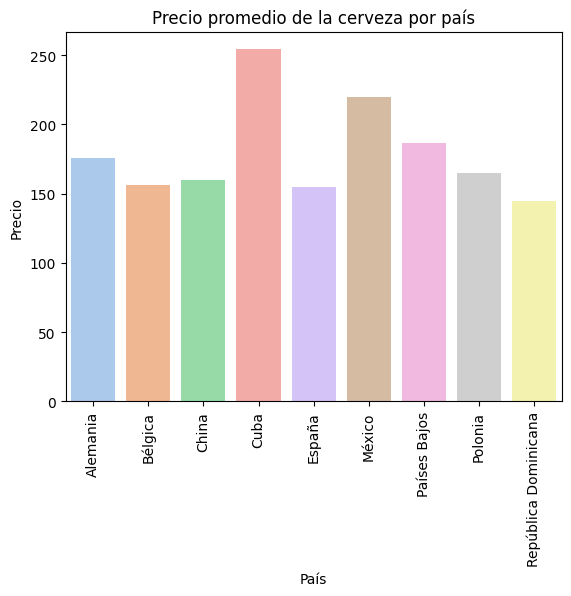

In [9]:
#Vamos a intentar hacer un gráfico de pirámide 
country_price=df.groupby("pais")["precio"].mean()
sns.barplot(y=country_price.values, x=country_price.index, palette="pastel") #crear el gráfico a través de sns.barplot y se definen los ejes
#para modificar el color de las barras en seaborn utilizamos la función palette
plt.title("Precio promedio de la cerveza por país") #nombre del gráfico
plt.xlabel("País") #nombre del eje de las x
plt.ylabel("Precio")  #nombre del eje de las y
plt.xticks(rotation=90) #el nombre de las barras saldrá de forma vertical

plt.show  #mostrar el gráfico


### ¿Qué relación guarda el precio de cada marca y el precio promedio de las cervezas? Es decir qué cervezas sobrepasan o no el precio promedio de la cerveza.
Una vez conocidos todos los precios de nuestra tabla de valores, no resulta difícil conocer que una cerveza promedio en Habana del Este presenta un costo de alrededor de 191 pesos cubanos.


In [10]:
prices=df["precio"] #filtrar el dataframe con respecto a la columna de los precios
media= prices.mean() #calcular el promedio de los valores
print("El precio promedio de una cerveza en habana del este es de " +str(media)+ " CUP")


El precio promedio de una cerveza en habana del este es de 191.15384615384616 CUP


### ¿Como se manifiesta la disponibilidad de la cerveza según el color?
Las personas que les gusta probar nuevas marcas de cerveza suelen tener alguna preferencia a la hora de ingerir cervezas claras o cervezas oscuras. 
Existe una mayor disponibilidad de cerveza clara (82.05% ) que de oscura un (14,10%)


In [11]:
#Ahora conoceremos la relación entre las cervezas claras y las oscuras
df_2=df["color"] #filtrar el dataframe por la columna referente al color
beer_color=list(df_2) #introducir los valores de la columna en una lista
dark= beer_color.count("oscura") #determinar cuántas cervezas son oscuras
light=beer_color.count("clara")  #determinar cuántas cervezas son claras
total_beer=len(df_2) #determinar el total de cervezas
#para saber qué porciento representan las cervezas claras y oscuras en relación con el total de cervezas
#vamos a hacer una funcion para calcular el porcentaje
def percent(variable, total):
    percent=variable*100/total
    return percent #devuelve el porciento
#Ahora para calcular el promedio de los cervezas usaremos la funcion percent
dark_percent= percent(dark,total_beer)
light_percent= percent(light, total_beer)

print(dark_percent, light_percent)
#Aquí va gráfico
#se podria analizar si existe alguna diferencia de precio entre las cervezas claras y las cervezas oscuras


14.102564102564102 82.05128205128206


<function matplotlib.pyplot.show(close=None, block=None)>

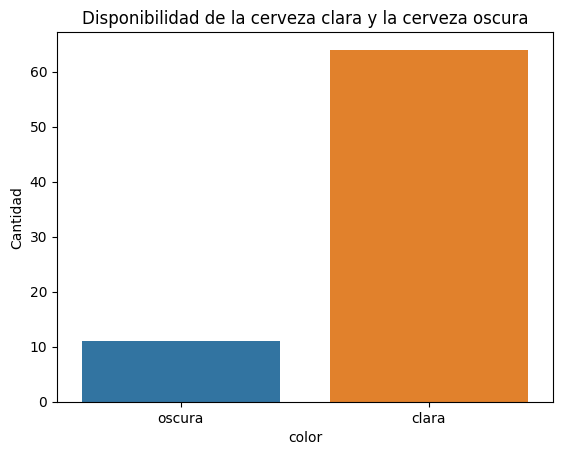

In [12]:
#a través de la biblioteca seaborn se realizará un grafico de barras vertical
sns.barplot(y=[dark,light], x=["oscura","clara"]) #crear el gráfico a través de sns.barplot y se definen los ejes
#Definir el nombre del gráfico y de los ejes
plt.title("Disponibilidad de la cerveza clara y la cerveza oscura") #título del gráfico
plt.xlabel("color")  #titulo del eje de las x
plt.ylabel("Cantidad")   #titulo del eje de las ordenadas

plt.show #mostrar el grafico
#probar el de dispersión

Al evaluar si existe alguna relación entre el color de la cerveza y su precio comprobamos que las cervezas claras son más caras que las oscuras, ya que si analizamos el precio promedio de una cerveza clara, se obtiene un precio de 207 CUP, mientras que en el caso de la cerveza oscura su precio promedio es de 188 CUP, es decir por debajo de la media promedio de los precios.

In [13]:
#Utilicemos un gráfico de dispersion para ver que color de cerveza predomina en habana del este
dark_beer=df[df["color"]=="oscura"] #filtrar las cervezas de color oscuro
dark_beer_prices=dark_beer[["precio"]] #filtrar el precio de las cervezas oscuras
media_dark_prices=dark_beer_prices.mean() #calcular el precio promedio de una cerveza oscura

light_beer=df[df["color"]=="clara"]  #filtrar las cervezas claras
light_beer_prices=light_beer[["precio"]]  #filtrar el precio de las cervezas claras
media_light_prices=light_beer_prices.mean() #calcular el precio promedio de las cervezas claras

print(media_dark_prices, media_light_prices)



precio    207.272727
dtype: float64 precio    187.8125
dtype: float64


### ¿Qué sucede si investigamos la disponibilidad de las diferentes cervezas correspondientes a marcas nacionales?
Al analizar la disponibilidad que tienen las cervezas cubanas, nos percatamos de que de las marcas nacionales, la cerveza con mayor disponibilidad es la cerveza Cristal, seguida de la cerveza Cristal Extra y por último en nuestra lista tenemos a la cerveza Bucanero.



<function matplotlib.pyplot.show(close=None, block=None)>

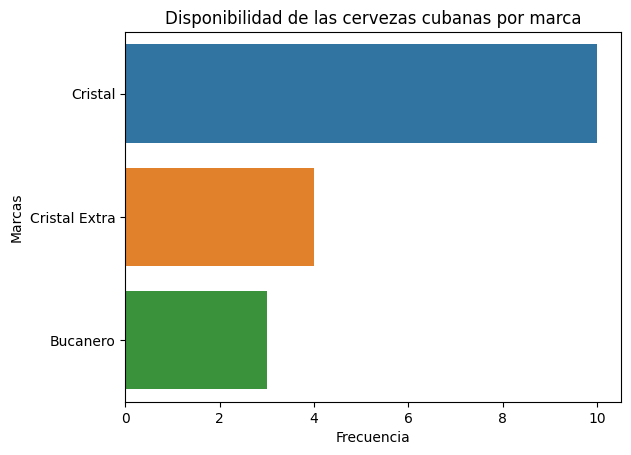

In [14]:
#analicemos ahora cual es la cerveza nacional con más disponibilidad
#para esto filtraremos nuestro dataframe en el que aparezcan solamente las
#marcas cubanas, o sea, los elementos que nosotros seleccionemos.
cuban_brands=df[df["pais"]=="Cuba"]
national_brands=cuban_brands["marca"].value_counts()
ordered_national_brandas=national_brands.sort_values(ascending=False)
ordered_national_brandas

#a través de la biblioteca seaborn se realizara un grafico de barras horizontal
sns.barplot(x=ordered_national_brandas.values, y=ordered_national_brandas.index) #crear el gráfico a través de sns.barplot y se definen los ejes
#Definir el nombre del gráfico y de los ejes
plt.title("Disponibilidad de las cervezas cubanas por marca") #título del gráfico
plt.xlabel("Frecuencia")  #titulo del eje de las x
plt.ylabel("Marcas")   #titulo del eje de las ordenadas

plt.show #mostrar el grafico

### ¿Existirá alguna relación entre la disponibilidad de la cerveza y su precio, en este caso de las marcas nacionales?

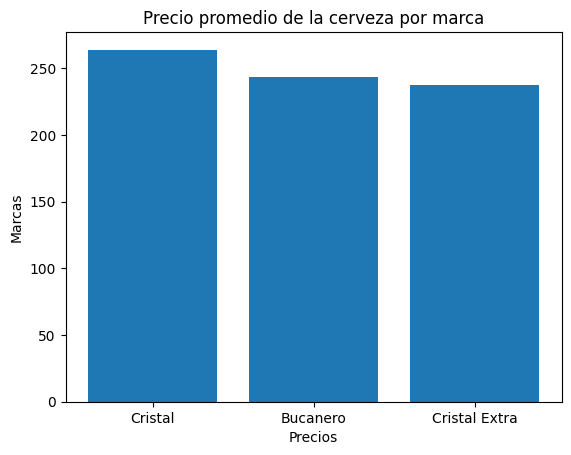

In [15]:
#ahora, si queremos saber cuál es la cerveza nacional más cara repetimos el mismo procedimiento pero esta vez nos enfocaremos
#en la columna relacionada con los precios
cuban_prices=cuban_brands.groupby("marca")["precio"].mean()
ordered_beer_prices=cuban_prices.sort_values(ascending=False)
ordered_beer_prices

#se utilizó matplotlib
fig, ax=plt.subplots()
ax.bar(ordered_beer_prices.index, ordered_beer_prices.values)
ax.set_title("Precio promedio de la cerveza por marca") #título del gráfico
ax.set_xlabel("Precios")  #titulo del eje de las x
ax.set_ylabel("Marcas") 

plt.show()

El gráfico nos muestra que el precio de la cerveza aumenta acorde aumenta su disponiblidad, por lo que la cerveza cristal, al presentar mayor disponibilidad, es también la cerveza que presenta el mayor precio.

### ¿Cómo  es habitual encontrar las botellas en Cuba atendiendo al envase de las mismas?
Si analizamos el tipo de envase las cervezas pueden estar enlatadas o embotellas, por lo que surge una interesante pregunta: ¿existirá alguna relación entre el tipo de envase en el que se comercializa la cerveza y su precio?
Contestemos esta interrogante a continuación:

Aunque podemos encontrar este producto de ambas formas, cabe destacar que predominan las cervezas enlatadas por encima de las embotelladas, representando las primeras el 85.88% del total de cervezas. Mientras que solo el 12.82% corresponde a las latas de cerveza embotelladas. Pero, ¿ a qué se debe que el número de envases de lata sea superior al número de cervezas en botella?
 Si analizamos las características de cada uno,considerando que las cervezas de lata se fabrican normalmente de aluminio, se enfrían más rápido,lo cual representa una ventaja para el dueño de una cafetería con abundante flujo de clientes.Es más conveniente que estas sean de lata ya que en el caso de Guanabo por ejemplo, sitio de gran interés para todos aquellos extranjeros que deciden pasar sus vacaciones en las cálidas aguas del Caribe, resulta realmente importante adquirir el producto bien frío, situación que aunque también puede ser posible con las botellas de cristal, se tarda más tiempo en enfriarse.
Por lo que la disponibilidad de la cerveza según el tipo de envase favorece a los vendedores del producto.


In [16]:
#in this part we are analizing the beers according to can or bottle.
#Once we have the amount we can calculate the percent
#Maybe I could compare this with their prices... just maybe
envase_beer=df[["tipo de envase"]]
envase_beer_can=df[df["tipo de envase"]=="lata"]
cans=len(envase_beer_can)
cans_percent=cans*100/len(envase_beer)

envase_beer_bottle=df[df["tipo de envase"]=="botella"]
bottles=len(envase_beer_bottle)
bottles_percent=bottles*100/len(envase_beer)



print("Podemos afirmar que "+str(cans)+ " de las cervezas son en lata. Lo que representa el "+ str(cans_percent)+ " %. Mientras que las de botella representan un "+ str(bottles_percent)+ "%")
#Aquí va gráfico


Podemos afirmar que 67 de las cervezas son en lata. Lo que representa el 85.8974358974359 %. Mientras que las de botella representan un 12.820512820512821%


### ¿Qué cerveza es la que más se importa en Cuba?
Si calculamos la moda de nuestro dataframe, excluyendo los datos correspondientes a las marcas cuyo país de origen es Cuba, obtenemos que en el número uno, encabezando nuestra lista se encuentra la cerveza Hollandia Premium.

In [17]:
#Para esto, primero filtraremos nuestro data frame para obtener las filas cuyos productos provienen de un pais distinto de Cuba
#Para esto utilizamos la función isin() que si negamos primero nuestro data frame, obtendremos una tabla de todas las cervezas
#importadas
imported_beer=~df["marca"].isin(["Cristal","Cristal Extra","Bucanero","Bucanero Máx"])
imported_beer_filtered=df[imported_beer]
imported_beer_filtered

#Luego para saber cual es la cerveza más importada solo debemos calcular la moda en esta columna

most_imported_beer= imported_beer_filtered["marca"].mode()
print( most_imported_beer)


0    Hollandia Premium
Name: marca, dtype: object


Ya hemos observado que existe una gran variedad cuando hablamos de cerveza, pero, ¿cuál es el porcentaje de alcohol que más está presente en las latas de cerveza independientemente de su marca?
Pues precisamente la respuesta a esta interrogante coincide con la moda de los porcentajes de alcohol de nuestras cervezas, que una vez calculada nos permite afirmar que la mayoría de las latas de cerveza que se comercializan en Habana del Este tiene un porcentaje de alcohol de 4.9%.

In [18]:
#se filtra la columna referente a los porcentajes de alcohol de las cervezas
alcohol_beer=df[["porcentaje de alcohol"]]
alcohol_media_percent=alcohol_beer.mode() #hallar la moda
print( str(alcohol_media_percent)+ " porciento")#imprime en pantalla la o las modas obtenidas




  porcentaje de alcohol
0                   4.9 porciento


 ### Relación entre el precio y la capacidad del envase
 Con el análisis del tipo de envase del producto, nos percatamos de que la cantidad de ml de alcohol puede influir o no en el precio de la cerveza. En general una cerveza en Habana del Este, independientemente de su tipo de envase tiene una capacidad de 330 ml. Para comprobar la veracidad de este plateamiento, compararemos, el precio promedio de las cervezas de 330 ml, las de 355 ml y por último las cervezas de 500 ml.
Si analizamos la diferencia de precio entre las cervezas en lata y de botella con la misma cantidad de ml, nos percatamos de que la diferencia de precio es mínima, ya que el precio de una cerveza en lata oscila entre los 162 CUP y el de la cerveza en botella en 160 CUP.


In [19]:
#Let´s compare the prices according to the ml of each 
capacity=df[["capacidad"]]
mode_ml= capacity.mode()
#Si queremos saber que capacidad predomina en la cerveza Cuba independientemente de su tipo de envase
#podemos utilizar la moda
#primero filtraremos la columna de nuestro dataframe relativa a la capacidad
#luego calcularemos la moda en la columna
print(mode_ml)


  capacidad
0       330


In [20]:
#Ahora calcularemos el promedio de los precios de una cerveza atendiendo a las que son de  330 ml y las de 500 ml
#para poder comparar si la diferencia de precios atendiendo a la cantidad de ml es muy notable.
#Analizar además en qué se diferencia el precio de las latas de 300 ml con las de 330 ml
#filtrar tres columnas específicas de mi dataframe
beer_330_ml= df[["precio","capacidad","tipo de envase"]]
#filtrar las cervezas con 330 ml de capacidad
beer_330_ml_filtered= beer_330_ml[beer_330_ml["capacidad"]==330]
#filtrar las cervezas enlatadas
beer_330_ml_can_filtered=beer_330_ml_filtered[beer_330_ml_filtered["tipo de envase"]=="lata"]
#filtrar las cervezas embotelladas
beer_330_ml_bottle_filtered=beer_330_ml_filtered[beer_330_ml_filtered["tipo de envase"]=="botella"]

#Una vez filtradas las cervezas de 330 ml y separadas segun el tipo de envase podemos calcular el precio promedio de las mismas por
#separado utilizando la funcion mean en la columna llamada precio
media_330_ml_can_beer= beer_330_ml_can_filtered["precio"].mean()
media_330_ml_bottle_beer=beer_330_ml_bottle_filtered["precio"].mean()

print(media_330_ml_bottle_beer, media_330_ml_can_beer)

160.0 162.82608695652175


## Bebidas Alcohólicas

Si de bebidas alcohólicas(exceptuando la cerveza ya analizada) se trata, la variedad de marcas resulta mayor o igual a la variedad de marcas existentes en la cerveza. Solo que esta vez se destacan dentro de esta categoría una serie de subcategorías que merecen la pena analizar detalladamente. Estamos hablando en este caso del ron, el whisky y el vodka, bebidas imprescindibles en los bares y restaurantes cubanos, y en el caso específico del ron, se destaca una amplia gama de productos que tienen la particularidad de ser fabricados en el territorio nacional.

In [21]:
#Para poder analizar los datos referentes a las bebidas alcohólicas, lo primero que tenemos que hacer es procesar 
#los datos referentes a las bebidas alcohólicas utilizando pandas
#extraer un diccionario específico de mi json con todas sus categorías a traves de pandas
alcoholic_drinks=data["ron"]
df_2=pd.DataFrame(alcoholic_drinks)
df_2

,municipio,marca,porcentaje de alcohol,precio,tipo,loc,capacidad,material,pais,imagenes
0,habana del este,Chanceler,38.0,1800,whisky,"[23.169559478759766, -82.13668060302734]",1000,cristal,Brasil,NaN
1,habana del este,Roskoff,37.5,1600,Vodka,"[23.169559478759766, -82.13668060302734]",965,cristal,Brasil,NaN
2,habana del este,Havana Club Añejo Especial,40.0,1600,ron,"[23.169679641723633, -82.13644409179688]",750,cristal,Cuba,./fotos/20230415_123354.jpg
3,habana del este,Galeón,34.0,1000,ron,"[23.1700439453125, -82.13549041748047]",750,plástico,Cuba,"[./fotos/20230415_123910.jpg, ./fotos/20230415..."
4,habana del este,Cajío,34.0,1500,ron,"[23.1700439453125, -82.13549041748047]",1500,plástico,Cuba,"[./fotos/20230415_123910.jpg, ./fotos/20230415..."
...,...,...,...,...,...,...,...,...,...,...
104,habana del este,Ron Cubay,38.0,1500,ron,"[23.157936096191406, -82.30081176757812]",700,cristal,Cuba,"[./fotos/20230416_111818.jpg, ./fotos/20230416..."
105,habana del este,Chanceler Edición Especial,40.0,1600,whisky,"[23.157936096191406, -82.30081176757812]",1000,cristal,Brasil,"[./fotos/20230416_111818.jpg, ./fotos/20230416..."
106,habana del este,B. Jelzin,40.0,1800,vodka,"[23.157936096191406, -82.30081176757812]",750,cristal,Cuba,"[./fotos/20230416_111818.jpg, ./fotos/20230416..."
107,habana del este,Vodka Tabarish,37.5,1000,vodka,NaN,1000,cristal,None,NaN


In [22]:

#filtra las filas de nuestro dataframe que se encuentren dentro de la categoría de ron
rum=df_2[df_2["tipo"]=="ron"]
rum #imprime nuestro nuevo dataframe

,municipio,marca,porcentaje de alcohol,precio,tipo,loc,capacidad,material,pais,imagenes
2,habana del este,Havana Club Añejo Especial,40.0,1600,ron,"[23.169679641723633, -82.13644409179688]",750,cristal,Cuba,./fotos/20230415_123354.jpg
3,habana del este,Galeón,34.0,1000,ron,"[23.1700439453125, -82.13549041748047]",750,plástico,Cuba,"[./fotos/20230415_123910.jpg, ./fotos/20230415..."
4,habana del este,Cajío,34.0,1500,ron,"[23.1700439453125, -82.13549041748047]",1500,plástico,Cuba,"[./fotos/20230415_123910.jpg, ./fotos/20230415..."
7,habana del este,Ron Santiago de Cuba 8 años,40.0,2800,ron,"[23.170026779174805, -82.13502502441406]",700,cristal,Cuba,"[./fotos/20230415_124332.jpg, ./fotos/20230415..."
15,habana del este,Havana Club 7 Años,40.0,5000,ron,"[23.169374465942383, -8214530944824219]",700,cristal,Cuba,./fotos/20230415_132143.jpg
16,habana del este,Havana Club Añejo Blanco,37.5,1750,ron,"[23.169374465942383, -8214530944824219]",700,cristal,Cuba,./fotos/20230415_132143.jpg
20,habana del este,Galeón,34.0,600,ron,"[23.17083168029785, -82.26295471191406]",750,plástico,Cuba,./fotos/20230415_151717.jpg
24,habana del este,Havana Club Reserva,40.0,1800,ron,"[23.171281814575195, -82.26495361328125]",750,cristal,Cuba,./fotos/20230415_152426.jpg
25,habana del este,Havana Club Añejo Especial,40.0,1600,ron,"[23.171281814575195, -82.26495361328125]",750,cristal,Cuba,./fotos/20230415_152426.jpg
26,NaN,Havana Club Profundo,40.0,1500,ron,"[23.171281814575195, -82.26495361328125]",700,cristal,Cuba,./fotos/20230415_152426.jpg


In [23]:
#ahora vamos a filtrar el whisky
whisky=df_2[df_2["tipo"]=="whisky"]
whisky

,municipio,marca,porcentaje de alcohol,precio,tipo,loc,capacidad,material,pais,imagenes
0,habana del este,Chanceler,38.0,1800,whisky,"[23.169559478759766, -82.13668060302734]",1000,cristal,Brasil,NaN
5,habana del este,Old Partner,40.0,1600,whisky,"[23.1700439453125, -82.13549041748047]",1000,cristal,España,"[./fotos/20230415_123910.jpg, ./fotos/20230415..."
6,habana del este,Chanceler,38.0,1600,whisky,"[23.169559478759766, -82.13668060302734]",1000,cristal,Brasil,NaN
10,habana del este,Label 5,40.0,3500,whisky,"[23.170026779174805, -82.13502502441406]",1000,cristal,Escocia,"[./fotos/20230415_124332.jpg, ./fotos/20230415..."
11,habana del este,Chanceler,38.0,1500,whisky,"[23.16931724548034, -82.14424133300781]",1000,cristal,Brasil,./fotos/20230415_131126.jpg
12,habana del este,Speech,40.0,1500,whisky,"[23.16931724548034, -82.14424133300781]",1000,cristal,España,./fotos/20230415_131126.jpg
17,habana del este,Elliot Hall,40.0,2000,whisky,"[23.169374465942383, -8214530944824219]",700,cristal,None,./fotos/20230415_132143.jpg
18,habana del este,Old Partner,40.0,2500,whisky,"[23.169374465942383, -8214530944824219]",1000,cristal,España,./fotos/20230415_132143.jpg
19,habana del este,Clan Campbell,40.0,5000,whisky,"[23.169374465942383, -8214530944824219]",1000,cristal,Escocia,./fotos/20230415_132143.jpg
21,habana del este,Chanceler,38.0,2000,whisky,"[23.171281814575195, -82.26495361328125]",1000,cristal,Brasil,./fotos/20230415_152426.jpg


In [24]:
#ahora vamos a filtrar el vodka
vodka=df_2[df_2["tipo"]=="vodka"]
vodka

,municipio,marca,porcentaje de alcohol,precio,tipo,loc,capacidad,material,pais,imagenes
8,habana del este,Vodka Tabarish,37.5,1700,vodka,"[23.170026779174805, -82.13502502441406]",700,cristal,None,"[./fotos/20230415_124332.jpg, ./fotos/20230415..."
9,habana del este,Samarskaya,37.5,1700,vodka,"[23.170026779174805, -82.13502502441406]",1000,cristal,Rusia,"[./fotos/20230415_124332.jpg, ./fotos/20230415..."
13,habana del este,Pushkaya,40.0,1500,vodka,"[23.16931724548034, -82.14424133300781]",1000,cristal,Rusia,./fotos/20230415_131126.jpg
14,habana del este,Skandinoff,37.5,1500,vodka,"[23.16931724548034, -82.14424133300781]",1000,cristal,Suecia,./fotos/20230415_131126.jpg
42,habana del este,Krilof Black Vodka,20.0,1500,vodka,"[23.169593811035156, -82.26411437988281]",700,cristal,Rusia,./fotos/20230415_153139.jpg
43,habana del este,Vodka Tabarish,37.5,1600,vodka,"[23.169593811035156, -82.26411437988281]",700,cristal,None,./fotos/20230415_153139.jpg
44,habana del este,Igor,40.0,1500,vodka,"[23.169593811035156, -82.26411437988281]",700,cristal,España,./fotos/20230415_153139.jpg
50,habana del este,Pushkaya,40.0,1600,vodka,"[23.16954803466797, -82.26399993896484]",1000,cristal,Rusia,./fotos/20230415_153551.jpg
54,habana del este,Regenta,40.0,700,vodka,"[23.1558780670166, -82.32806396484375]",1000,plástico,Cuba,"[./fotos/20230416_093653.jpg, ./fotos/ 2023041..."
56,habana del este,Vodka Tabarish,37.5,1700,vodka,"[23.1558780670166, -82.32806396484375]",1000,cristal,None,"[./fotos/20230416_093653.jpg, ./fotos/ 2023041..."


### Precio promedio por cada tipo de producto.
Debido a que cada una de esta bebidas tiene sus propias particularidades, resulta imposible analizar el precio promedio de las mismas de forma conjunta.
Separando el precio promedio atendiendo a la categoría tenemos que el ron que se comercializa en Cuba tiene un precio promedio de 2161 CUP.
En el caso del whisky, se puede apreciar que su precio promedio es de aproximadamente 2801 CUP, mientras que un vodka promedio en Habana del Este tiene un costo de 1965 CUP.

In [25]:
#Para calcular la media del precio del ron en habana del este debemos filtrar los datos referentes al precio del ron
rum_prices= rum[["marca","precio"]]
rum_prices
media_rum= rum_prices["precio"].mean()
print("Podemos decir que una botella de ron en habana del este tiene un precio promedio de "+ str(media_rum))

Podemos decir que una botella de ron en habana del este tiene un precio promedio de 2161.4583333333335


In [26]:
#Con este codigo hemos calculado la media del precio del whiskey
whisky_prices=whisky[["marca","precio"]]
whisky_prices
media_whisky=whisky_prices["precio"].mean()
print("Podemos decir que una botella de whisky en habana del este tiene un precio promedio de "+ str(media_whisky))


Podemos decir que una botella de whisky en habana del este tiene un precio promedio de 2801.0


In [27]:
#Con este codigo hemos calculado la media del precio del vodka
vodka_prices=vodka[["marca","precio"]]
vodka_prices
media_vodka=vodka_prices["precio"].mean()
print("Podemos decir que una botella de vodka en habana del este tiene un precio promedio de "+ str(media_vodka))

Podemos decir que una botella de vodka en habana del este tiene un precio promedio de 1964.7058823529412


En este caso si queremos ver en que se diferencia el precio atendiendo al tipo de bebida tenemos que entre estos tres tipos de bebida,la más cara es el whisky, seguido por el ron y la más barata es el vodka

<function matplotlib.pyplot.show(close=None, block=None)>

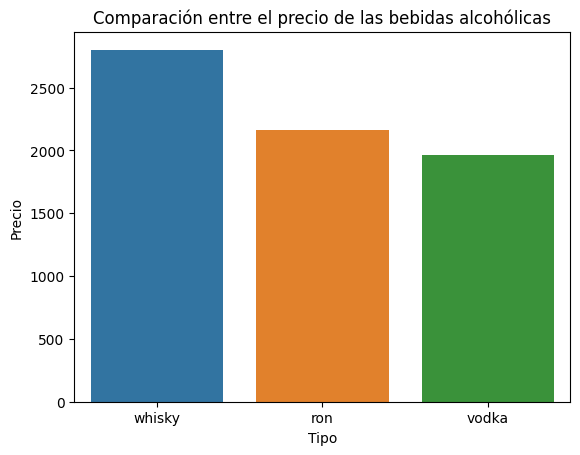

In [28]:
sns.barplot(x=["whisky", "ron","vodka"], y=[media_whisky,media_rum,media_vodka]) #crear el gráfico a través de sns.barplot y se definen los ejes
#Definir el nombre del gráfico y de los ejes
plt.title("Comparación entre el precio de las bebidas alcohólicas") #título del gráfico
plt.xlabel("Tipo")  #titulo del eje de las x
plt.ylabel("Precio")   #titulo del eje de las ordenadas

plt.show #mostrar el grafico

### Bebidas más importadas por categoría:
Repitamos el mismo procedimiento realizado hasta ahora para determinar las marcas más importadas y los países más exportadores por categoría.

En este caso analicemos específicamente el whisky. 
De este análisis obtenemos que el whisky que más se importa en Cuba es el Chanceler y el país que más exporta whiskys hacia Cuba es Escocia. En el caso del vodka el que más se importa es el Tabarish.

In [29]:
#En el siguiente codigo veamos cual es el whisky mas importado a nivel mundial
whisky_imported=whisky[["marca","pais"]]
#para saber cual es el whisky más importado a nivel mundial lo unico que tenemos que hacer es calcular la moda referente
#a la columna marca de nuestro nuevo dataframe
most_imported_whisky=whisky_imported["marca"].mode()
print("El whiskey más importado en Cuba es el "+ most_imported_whisky)


0    El whiskey más importado en Cuba es el Chanceler
Name: marca, dtype: object


In [30]:
#analicemos las marcas más importadas de la mayor a la menor
ranking_whisky_imported=whisky["marca"].value_counts()
ordered_whisky_brands=ranking_whisky_imported.sort_values(ascending=False)
top_3_whisky=ordered_whisky_brands.head(3)
top_3_whisky

#aquí va gráfico


marca
Chanceler                     8
Old Partner                   5
Chanceler Edición Especial    4
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

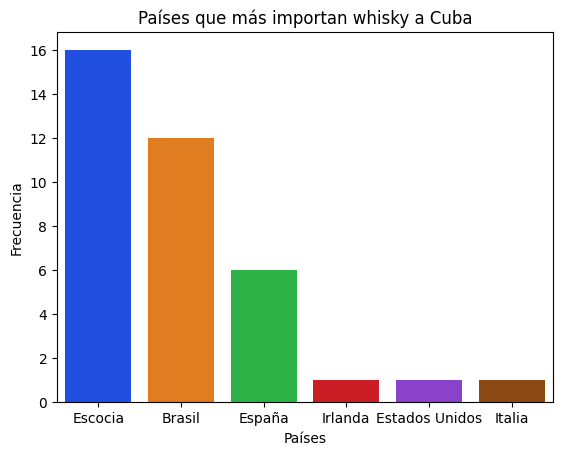

In [31]:
ranking_whisky_country=whisky["pais"].value_counts()
ordered_whisky_country=ranking_whisky_country.sort_values(ascending=False)
ordered_whisky_country
sns.barplot(y=ordered_whisky_country.values, x=ordered_whisky_country.index, palette="bright") #crear el gráfico a trabe de sns.barplot y se definen los ejes

plt.title("Países que más importan whisky a Cuba")
plt.xlabel("Países")
plt.ylabel("Frecuencia")

plt.show

In [32]:
#En el siguiente codigo veamos cual es el vodka mas importado a nivel mundial
vodka_imported=vodka[["marca","pais"]]
#para saber cual es el vodka más importado a nivel mundial lo unico que tenemos que hacer es calcular la moda referente
#a la columna marca de nuestro nuevo dataframe
most_imported_vodka=vodka_imported.mode()
most_imported_vodka
print("El Vodka más importado es el vodka Tabarish el cual es una bebid Rusa")

El Vodka más importado es el vodka Tabarish el cual es una bebid Rusa


### Acercándonos un poco más a Cuba
Si bien ya hemos analizado la actividad de exportación del resto de los países debemos analizar las marcas nacionales, en aras de determinar el precio de estas bebidas con el resto.
Ron más vendido:
Si analizamos la disponibilidad del producto en la lista de los rones correspondientes, observamos que en el primer lugar del top de los rones más vendidos se encuentra el Ron Añejo Especial, seguido por el Havana Club Ron Reserva y el Ron Santiago de Cuba 8 años.


<function matplotlib.pyplot.show(close=None, block=None)>

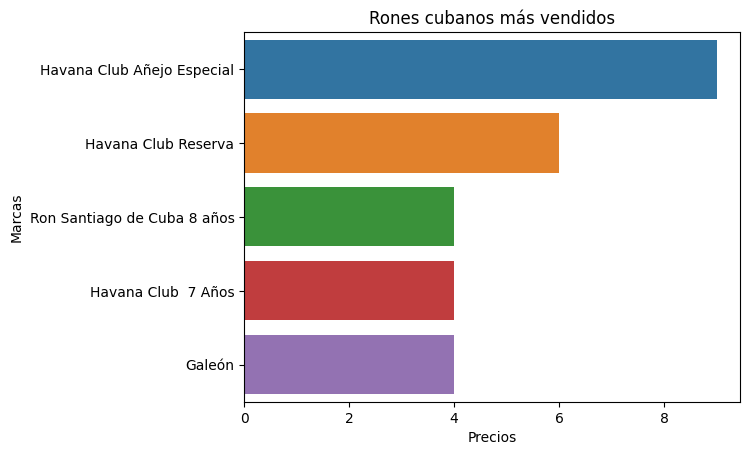

In [33]:
#En el siguiente código haremos un zoom en los rones cubanos, para así poder analizar como varían los precios de los mismos.
#Además conoceremos cuál es el ron nacional más caro
#Y cuál es el que mayor disponibilidad presenta

#lo primero que haremos será filtrar nuestro dataframe referente a los rones de tal manera que solo nos queden los que son cubanos
#para lo cual utilizaremos la función insin
#luego contamos cuantas veces se repite la marca 
#y ordenamos esto de mayor a menor
#obteniendo asi la disponibilidad
cuban_rums=rum[rum["pais"].isin(["Cuba"])]
cuban_rums_available= cuban_rums["marca"].value_counts()
cuban_rums_ranking=cuban_rums_available.sort_values(ascending=False)
cuban_rums_ranking=cuban_rums_ranking.head()
#aquí va gráfico
#a través de la biblioteca seaborn se realizara un grafico de barras horizontal
sns.barplot(x=cuban_rums_ranking.values, y=cuban_rums_ranking.index) #crear el gráfico a través de sns.barplot y se definen los ejes
#Definir el nombre del gráfico y de los ejes
plt.title("Rones cubanos más vendidos") #título del gráfico
plt.xlabel("Precios")  #titulo del eje de las x
plt.ylabel("Marcas")   #titulo del eje de las ordenadas

plt.show #mostrar el grafico

#aqui tenemos un ranking de la disponibilidad del ron cubano
#se puede hacer un gráfico titulado rones cubanos más vendidos


### ¿Enacabezarán los mismos productos que tenían mayor disponibilidad la lista de los rones más caros de Cuba?
Veamos a continuación:

<function matplotlib.pyplot.show(close=None, block=None)>

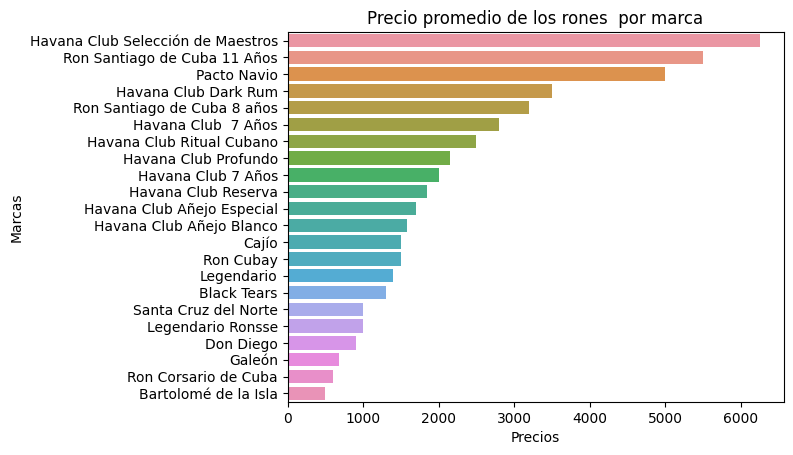

In [34]:
#Si queremos conocer cual es el ron mas caro de nuestra lista podemos 
#Calculamos primero el promedio por marca y hagamos un ranking
#para calcular el promedio por marca utilizaremos nuevamente la funcion groupby
media_per_brand=cuban_rums.groupby("marca")["precio"].mean()
ordered_media_prices=media_per_brand.sort_values(ascending=False)
ordered_media_prices
#aquí va gráfico
#a través de la biblioteca seaborn se realizara un grafico de barras horizontal
sns.barplot(x=ordered_media_prices.values, y=ordered_media_prices.index) #crear el gráfico a través de sns.barplot y se definen los ejes
#Definir el nombre del gráfico y de los ejes
plt.title("Precio promedio de los rones  por marca") #título del gráfico
plt.xlabel("Precios")  #titulo del eje de las x
plt.ylabel("Marcas")   #titulo del eje de las ordenadas

plt.show #mostrar el grafico

Luego se combrueba que en el caso de este producto no necesariamente, los mismos productos que encabezan la lista de los productos más vendidos, encabezarán también la lista de los países con los precios más caros.

### ¿Qué sucedería si ahora comparamos los precios del ron según el material en el que se ha envasado?
Al calcular el precio promedio de los rones envasados en botellas de plástico en relación con los rones envasados en botellas de cristal nos percatamos de que la diferencia de precios entre estos dos tipos de envases es relevante ya que mientras el precio promedio de un ron envasado en plástico es de 728 CUP y el precio promedio de una botella de ron de cristal es de 2428.75 CUP. 
Sin embargo, solomente conociendo este dato referente al material del envase no es suficiente para generalizar sobre el precio promedio de ambas rones, ya que también depende de la cantidad de ml del recipiente y su porcentaje de alcohol.

In [35]:
#En este caso veremos si existe alguna relación entre el material del envase y el precio. En este caso del ron que es el que tiene
#una diferenciación en el tipo de envase ya sea de cristal o de plástico

#para esto lo primero que haremos será filtrar los rones cuyo material sea el cristal
rum_glass_prices=rum[rum["material"]=="cristal"]
#una vez filtrado se procede a calcular el promedio de los precios del ron envasado en botellas de cristal
rum_glass_prices_media=rum_glass_prices["precio"].mean()


#pra conocer el precio promedio de una botella de ron envasada en plástico es el mismo procedimiento
#lo que en este caso tenemos que filtrar aquellas botellas que son plásticas
rum_plastic_prices=rum[rum["material"]=="plástico"]
#se halla el promedio de los precios de este nuevo dataframe
rum_plastic_prices_media=rum_plastic_prices["precio"].mean()

#si queremos saber la diferencia de precio ya tu sabes lo que podemos hacer
print(rum_plastic_prices_media, rum_glass_prices_media)



728.5714285714286 2428.75


In [36]:
#Veamos ahora el porcentaje de alcohol tanto del ron, de la cerveza, como del vodka
#por lo que nos encargaremos de filtar nuestros data frames ahora teniendo en cuenta la columna llamada porcentaje de alcohol

#primero analizaremos el ron:
alcohol_rum=rum[["marca","porcentaje de alcohol"]]
alcohol_rum_ordered=alcohol_rum.sort_values(by="porcentaje de alcohol")
alcohol_rum_ordered


#si salimos a caminar por las calles de habana es más comun que nos encontremos el ron con un determinado porcentaje de alcohol
#es decir la moda de los porcentajes, la cual calcularemos a continuacion
common_percent_rum= alcohol_rum["porcentaje de alcohol"].mode()
print("El porcentaje de alcohol que más abunda en una botella de ron es de un "+ str(common_percent_rum))

#Ahora si queremos calcular el porcentaje promedio de una bottella de ron en Habana del Este 
#procedemos de la siguiente forma
media_alcohol_rum=alcohol_rum["porcentaje de alcohol"].mean()

#Debido a las criticas consecuencias que trae el consumo de alcohol para la salud analicemos cuales son los rones más dañinos, 
#es decir los rones que presentan mayor porcentaje de alcohol
alcohol_rum_percent_ranking=alcohol_rum.sort_values(by="porcentaje de alcohol", ascending=False)
alcohol_rum_percent_ranking=alcohol_rum_percent_ranking[["marca","porcentaje de alcohol"]]
alcohol_rum_percent_ranking
#El codigo anterior me devolvera un data frame ordendo donde se muestren los rones desde el que tiene mayor porcentaje de alcohol
#Hasta el que tiene menor porcentaje de alcohol


El porcentaje de alcohol que más abunda en una botella de ron es de un 0    40.0
Name: porcentaje de alcohol, dtype: float64


,marca,porcentaje de alcohol
75,Havana Club Selección de Maestros,45.0
34,Havana Club Selección de Maestros,45.0
2,Havana Club Añejo Especial,40.0
68,Ron Santiago de Cuba 8 años,40.0
58,Havana Club Añejo Especial,40.0
92,Santa Cruz del Norte,40.0
61,Havana Club Reserva,40.0
90,Havana Club Añejo Especial,40.0
67,Ron Santiago de Cuba 11 Años,40.0
69,Havana Club Añejo Especial,40.0


El porcentaje de alcohol que más abunda en una botella de whisky es de un 0    40.0
Name: porcentaje de alcohol, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

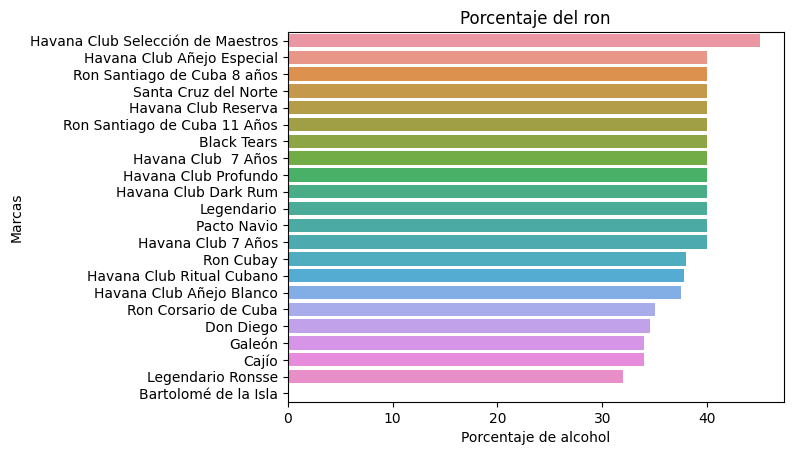

In [37]:
#Repitamos lo mismo con el whisky para saber cual es el que presenta mayor porcentaje de alcohol
#Primero filtremos el dataframe del whisky y 
# determinaremos cual es el porcentaje de alcohol que normalmente tiene una botella de whisky
alcohol_whisky=whisky[["marca","porcentaje de alcohol"]]
common_percent_whisky= alcohol_whisky["porcentaje de alcohol"].mode()
print("El porcentaje de alcohol que más abunda en una botella de whisky es de un "+ str(common_percent_whisky))

#Ahora si queremos calcular el porcentaje promedio de una bottella de whisky en Habana del Este 
#procedemos de la siguiente forma
media_alcohol_whisky=alcohol_whisky["porcentaje de alcohol"].mean()

# los whiskys que presentan mayor porcentaje de alcohol
alcohol_whisky_percent_ranking=alcohol_whisky.sort_values(by="porcentaje de alcohol", ascending=False)
alcohol_whisky_percent_ranking
sns.barplot(x=alcohol_rum_percent_ranking["porcentaje de alcohol"], y=alcohol_rum_percent_ranking["marca"]) #crear el gráfico a través de sns.barplot y se definen los ejes
#Definir el nombre del gráfico y de los ejes
plt.title("Porcentaje del ron") #título del gráfico
plt.xlabel("Porcentaje de alcohol")  #titulo del eje de las x
plt.ylabel("Marcas")   #titulo del eje de las ordenadas

plt.show #mostrar el grafico

In [38]:
#Lo mismo de arriba pero esta vez para el vodka
#Primero filtremos el dataframe del vodka y 
# determinaremos cual es el porcentaje de alcohol que normalmente tiene una botella de vodka
alcohol_vodka=vodka[["marca","porcentaje de alcohol"]]
common_percent_vodka= alcohol_vodka["porcentaje de alcohol"].mode()
print("El porcentaje de alcohol que más abunda en una botella de vodka es de un "+ str(common_percent_vodka))

# los vodka que presentan mayor porcentaje de alcohol
alcohol_vodka_percent_ranking=alcohol_vodka.sort_values(by="porcentaje de alcohol", ascending=False)
alcohol_vodka_percent_ranking

El porcentaje de alcohol que más abunda en una botella de vodka es de un 0    40.0
Name: porcentaje de alcohol, dtype: float64


,marca,porcentaje de alcohol
54,Regenta,40.0
64,Igor,40.0
13,Pushkaya,40.0
106,B. Jelzin,40.0
99,Regenta,40.0
44,Igor,40.0
50,Pushkaya,40.0
83,Grey Goose,40.0
82,Lyubov Vodka,40.0
91,Vodka Tabarish,37.5


### Precio de las bebidas alcohólicas según su capacidad
Analicemos los precios del ron según la capacidad que este posee:
Al hallar el precio promedio del ron según la capacidad que estos presentan, la diferencia es notable. Mientras que el precio promedio de una botella de ron de 750 mililitros es de 1100 CUP, el precio promedio de una botella de 1000 ml es de 1517 CUP aproximadamente.

In [39]:
rum_capacity_750= rum[rum["capacidad"]==750]
rum_capacity_1000=rum[rum["capacidad"]==1000]

small_size=rum_capacity_750["precio"].mean()
bigger_size=rum_capacity_1000["precio"].mean()

print(bigger_size,small_size)

1100.0 1516.6666666666667


### Precio de la cebolla

Si bien la cebolla es un producto que no guarda mucha relación con los productos mencionados anteriormente, constituye un alimento imprescindible en las cocinas cubanas, no solo por el simple hecho de reportar múltiples beneficios para la salud, sino también porque forma parte de nuestro increíble sazón cubano el cual es reconocido a nivel internacional.
Realizar un estudio sobre el precio de este producto en particular, resulta bastante complejo ya que no en todas las ocasiones este producto se encuentra disponible.

In [40]:
onion=data["cebolla"] #extraer la información del diccionario "cebolla"
ceb=pd.DataFrame(onion)
ceb


,municipio,categoria,precio,color,loc,imagenes
0,habana del este,libra,170,morada,"[23.16974449157715, -82.13732147216797]","[./fotos/20230415_123030.jpg, ./fotos/20230415..."
1,habana del este,libra,180,morada,"[23.169679641723633, -82.13644409179688]",./fotos/20230415_123354.jpg
2,habana del este,libra,180,blanca,"[23.1673583984375, -82.14093017578125]","[./fotos/20230415_130834.jpg, ./fotos/20230415..."
3,habana del este,unidad,150,blanca,"[23.1673583984375, -82.14093017578125]","[./fotos/20230415_130834.jpg, ./fotos/20230415..."
4,habana del este,libra,160,blanca,"[23.165676, -82.281958]",./fotos/IMG_20230415_091842.jpg
5,habana del este,libra,150,blanca,"[23.167126, -82.282084]",./fotos/IMG_20230415_091856.jpg
6,habana del este,libra,150,blanca,"[23.170929, -82.131766]",./fotos/IMG_20230415_092105.jpg
7,habana del este,libra,150,blanca,"[23.171021, -82.131872]",./fotos/IMG_20230415_092213.jpg
8,habana del este,libra,170,blanca,"[23.171021, -82.131872]",./fotos/IMG_20230415_092240.jpg
9,habana del este,libra,170,blanca,"[23.168404, -82.281552]",./fotos/IMG_20230419_104257.jpg


A la hora de trabajar con este producto, lo encontramos de dos tipos atendiendo a su color: la cebolla blanca y la cebolla morada.
#### ¿Los precios de la cebolla sufren algún cambio atendiendo a su color?
#### Comprobemos:

Conociendo la cantidad de cebolla blanca y la cantidad de cebolla morada presentes en nuestros datos, somos capaces de hallar una medio de los precios de cada tipo por lo que estos resultados arrojan a que la diferencia de precio atendiendo al color de la cebolla es muy pequeña. Mientras que el precio promedio de la cebolla blanca es de aproximadamente 164 CUP, el de la cebolla morada es de 154 CUP.

In [41]:
ceb_purple= ceb[ceb["color"]=="morada"]
ceb_white=ceb[ceb["color"]=="blanca"]

media_ceb_purple=ceb_purple["precio"].mean()
media_ceb_white=ceb_white["precio"].mean()

print("La cebolla morada tiene un precio promedio de "+str(media_ceb_purple) +" CUP y la blanca de "+ str(media_ceb_white))

La cebolla morada tiene un precio promedio de 154.44444444444446 CUP y la blanca de 164.0909090909091


<function matplotlib.pyplot.show(close=None, block=None)>

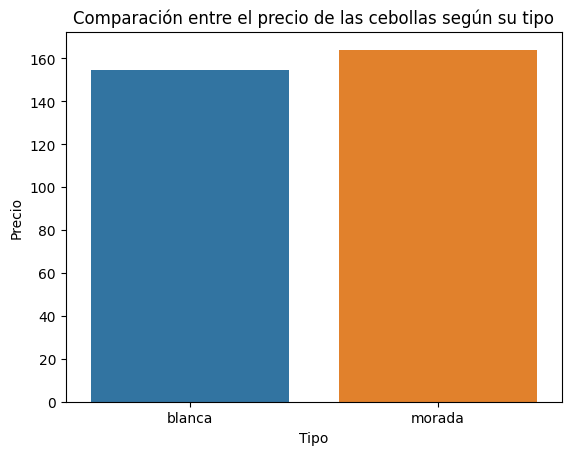

In [42]:
sns.barplot(x=["blanca","morada"], y=[media_ceb_purple,media_ceb_white]) #crear el gráfico a través de sns.barplot y se definen los ejes
#Definir el nombre del gráfico y de los ejes
plt.title("Comparación entre el precio de las cebollas según su tipo") #título del gráfico
plt.xlabel("Tipo")  #titulo del eje de las x
plt.ylabel("Precio")   #titulo del eje de las ordenadas

plt.show #mostrar el grafico

Por lo que la más cara entre ambas es la de tipo morada.
### Disponibilidad de la cebolla:
Como parte del desarrollo de este estudio se pretendía analizar el precio de la cebolla según la forma en la que la misma era vendida a la población. Sin embargo, al analizar los datos capturados nos percatamos de que la gran mayoría de la cebolla se vendía en libras.
### Veamos la distribución de la cebolla según su tipo:


<function matplotlib.pyplot.show(close=None, block=None)>

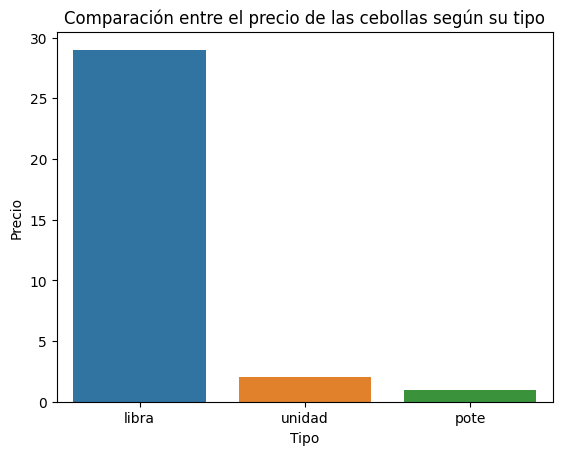

In [43]:
ceb_type= ceb["categoria"]
ceb_tp= ceb_type.value_counts() #hallar el promedio de los precios atendiendo a la marca
ceb_tp_1=ceb_tp.sort_values(ascending=False) #ordenar la columna de mayor a menor
more_expensive_beers 
sns.barplot(y=ceb_tp_1.values, x=ceb_tp_1.index) #crear el gráfico a través de sns.barplot y se definen los ejes
#Definir el nombre del gráfico y de los ejes
plt.title("Comparación entre el precio de las cebollas según su tipo") #título del gráfico
plt.xlabel("Tipo")  #titulo del eje de las x
plt.ylabel("Precio")   #titulo del eje de las ordenadas

plt.show #mostrar el grafico

### ¿A qué conclusiones podemos arribar?
Si bien es cierto que los precios de lo productos son de por sí bastante elevados, a lo largo de este proyecto investigativo hemos podido comprobar que el factor precio se ve influenciado por una serie de elementos, que a la vez varían en dependencia del producto.

En el caso de las bebidas alcohólicas(incluyendo a la cerveza) en general se han observado ciertos patrones en cuanto al precio dependiendo del país del que procede el producto, el porcentaje de alcohol, la cantidad de mililitros del envase, el color de la bebida, el tipo, y en el material en el cual se envasa.
Al analizar la cebolla también se han observado variaciones en su precio teniendo en cuenta el color de la misma y la escasa disponibilidad si se tiene en cuenta las diferentes formas en las que se pueden encontrar las mismas.

Es importante mencionar que nuestro estudio de los precios está comprendido entre los meses de abril y mayo del año 2023. Por lo que puede ser utilizado posteriormente para el análisis de los precios de estos productos en años posteriores para así analizar su variación a lo largo del tiempo.